In [37]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

## Helper functions

In [154]:
def gen_image(arr):
    two_d = np.reshape(arr, (28, 28)).astype(np.float64)
    plt.imshow(two_d, cmap='gray')
    return plt

In [227]:
def get_classes(X, y, classes):
    idx = np.isin(y, classes)
    for c in classes:
        n_class = len(y[y == c])
        print("Number of {}: {}".format(c, n_class))
    return X[idx], y[idx]

def to_binary(y, classes):
    f = np.vectorize(lambda x: classes.index(x))
    return f(y)

## Get the data

In [2]:
mnist = fetch_openml('mnist_784')

In [192]:
X = mnist['data']
y = mnist['target']
X, y = get_classes(X, y, classes)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
print(len(x_train))

Number of 8: 6825
Number of 9: 6958
2756


## Train model

In [253]:
model = LogisticRegression()
model.fit(x_train, y_train)
classes = list(model.classes_)
classes

/Users/cfizette/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['8', '9']

In [247]:
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:,1]
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_proba))

0.9727033644690306
0.9953349820957482


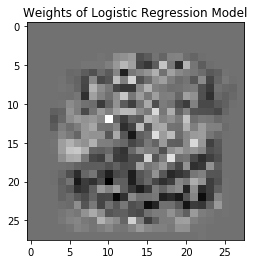

In [314]:
gen_image(model.coef_)
plt.title('Weights of Logistic Regression Model')
plt.show()

## Adversarial Examples

In [254]:
def to_binary(y):
    f = np.vectorize(lambda x: classes.index(x))
    return f(y)

def to_class(y):
    f = np.vectorize(lambda x: classes[int(x)])
    return f(y)

def adversarial_example(x, y, model, eps=0.0001):
    x = x.reshape(1,len(x))
    y = to_binary(y)
    diff = y - model.predict_proba(x)[:,1]
    weights = model.coef_.reshape(784)
    sign = np.sign(diff * weights)
    noise = sign * eps
    return x - noise, noise

In [323]:
def plot_pred_vs_eps(x, y, eps):
    fig = plt.figure(figsize=(20, 20))
    for i, e in enumerate(eps):
        img, _ = adversarial_example(x, y, model, eps=e)
        img = img.reshape((28, 28))
        subplt = fig.add_subplot(1, len(eps), i+1)
        y_proba = model.predict_proba([img.flatten()])[0]
        subplt.title.set_text('Eps: {0}\n p(y={1}): {2:.4f}\n p(y={3}): {4:1.4f}'.format(e, to_class(0), y_proba[0], to_class(1), y_proba[1]))
        plt.imshow(img)
    plt.show()

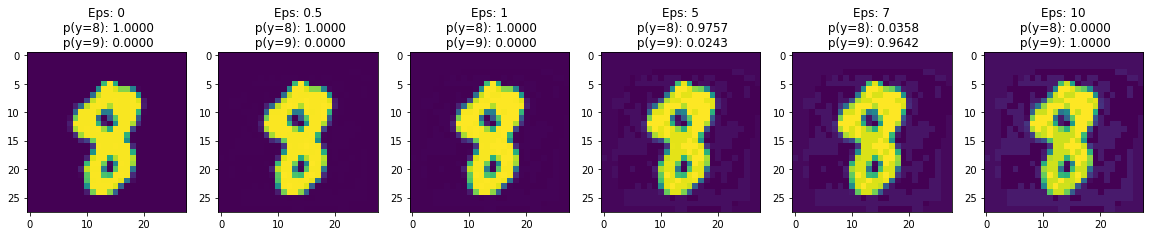

In [324]:
eps = [0, 0.5, 1, 5, 7, 10]
plot_pred_vs_eps(x_test[5], y_test[5], eps)

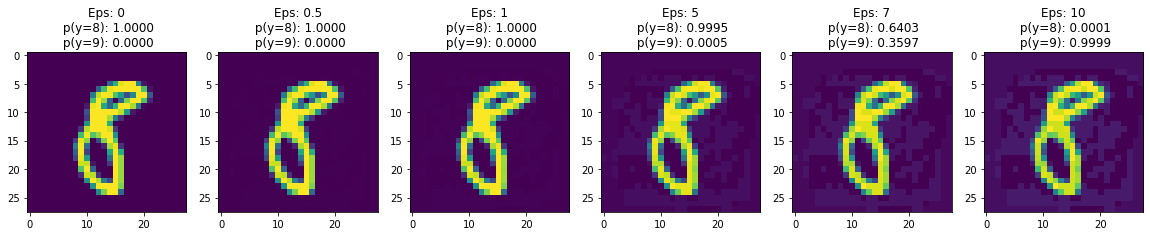

In [325]:
plot_pred_vs_eps(x_test[10], y_test[10], eps)

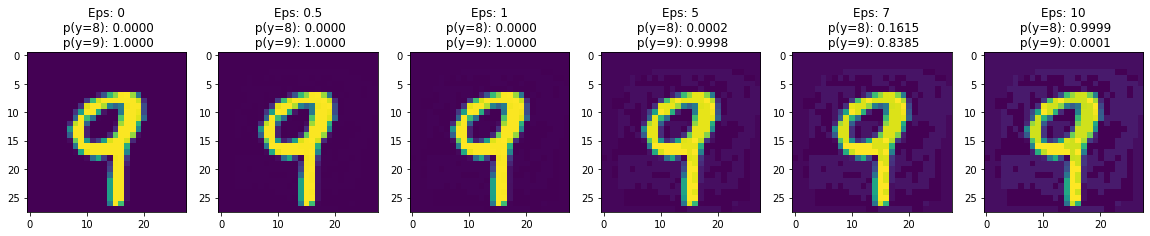

In [326]:
plot_pred_vs_eps(x_test[7], y_test[7], eps)